In [1]:
%matplotlib inline

In [3]:
!pip3 install -r requirements.txt

  Using cached https://files.pythonhosted.org/packages/bb/35/46fa4230b3a402dd1e39c070ca4d82289f7497ae1a3c223a462e8bf3206a/EMD_signal-0.2.10-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/b8/a6/d1a816b89aa1e9e96bcb298eb1ee1854f21662ebc6d55ffa3d7b3b50122b/joblib-0.15.1-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/e9/69/f5e05f578585ed9935247be3788b374f90701296a70c8871bcd6d21edb00/matplotlib-3.0.3-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/2b/de/6e4dd6d720c49939544352155dc06a08c9f7e4271aa631a559dfbeaaf9d4/missingno-0.4.2-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/03/27/e35e7c6e6a52fab9fcc64fc2b20c6b516eba930bb02b10ace3b38200d3ab/numpy-1.18.4-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/bb/71/8f53bdbcbc67c912b888b40def255767e475402e9df64050019149b1a943/pandas-1.0.3-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://

  Using cached https://files.pythonhosted.org/packages/ca/ab/872a23e29cec3cf2594af7e857f18b687ad21039c1f9b922fac5b9b142d5/traitlets-4.3.3-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/dc/41/9fa443d5ae8907dd8f7d12146cb0092dc053afd67b5b57e7e8786a328547/jupyter_client-6.1.7-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/ed/1b/72a1821152d07cf1d8b6fce298aeb06a7eb90f4d6d41acec9861e7cc6df0/decorator-4.4.2-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/39/7b/88dbb785881c28a102619d46423cb853b46dbccc70d3ac362d99773a78ce/pexpect-4.8.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/2b/c1/53ac685833200eb77ef485c2220dac5bfc255418e660790a9eb5cf3abf25/prompt_toolkit-3.0.7-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/4c/1c/ff6546b6c12603d8dd1070aa3c3d273ad4c07f5771689a7b69a550e8c951/backcall-0.2.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/p

  Using cached https://files.pythonhosted.org/packages/56/ff/34bf45e5cf8367edcf4946b26690f0982b3ec701b0a655edfe562d29e246/pyzmq-19.0.2-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/d1/29/605c2cc68a9992d18dada28206eeada56ea4bd07a239669da41674648b6f/ptyprocess-0.6.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/59/7c/e39aca596badaf1b78e8f547c807b04dae603a433d3e7a7e04d67f2ef3e5/wcwidth-0.2.5-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/93/d1/e635bdde32890db5aeb2ffbde17e74f68986305a4466b0aa373b861e3f00/parso-0.7.1-py2.py3-none-any.whl
Exception:
Traceback (most recent call last):
  File "/usr/lib/python3/dist-packages/pip/basecommand.py", line 215, in main
    status = self.run(options, args)
  File "/usr/lib/python3/dist-packages/pip/commands/install.py", line 360, in run
    prefix=options.prefix_path,
  File "/usr/lib/python3/dist-packages/pip/req/req_set.py", line 784, in install
    

function:'read_prm' took: 0.00 sec
function:'process' took: 3.86 sec
function:'read_prm' took: 0.00 sec
Dash app running on http://127.0.0.1:8050/


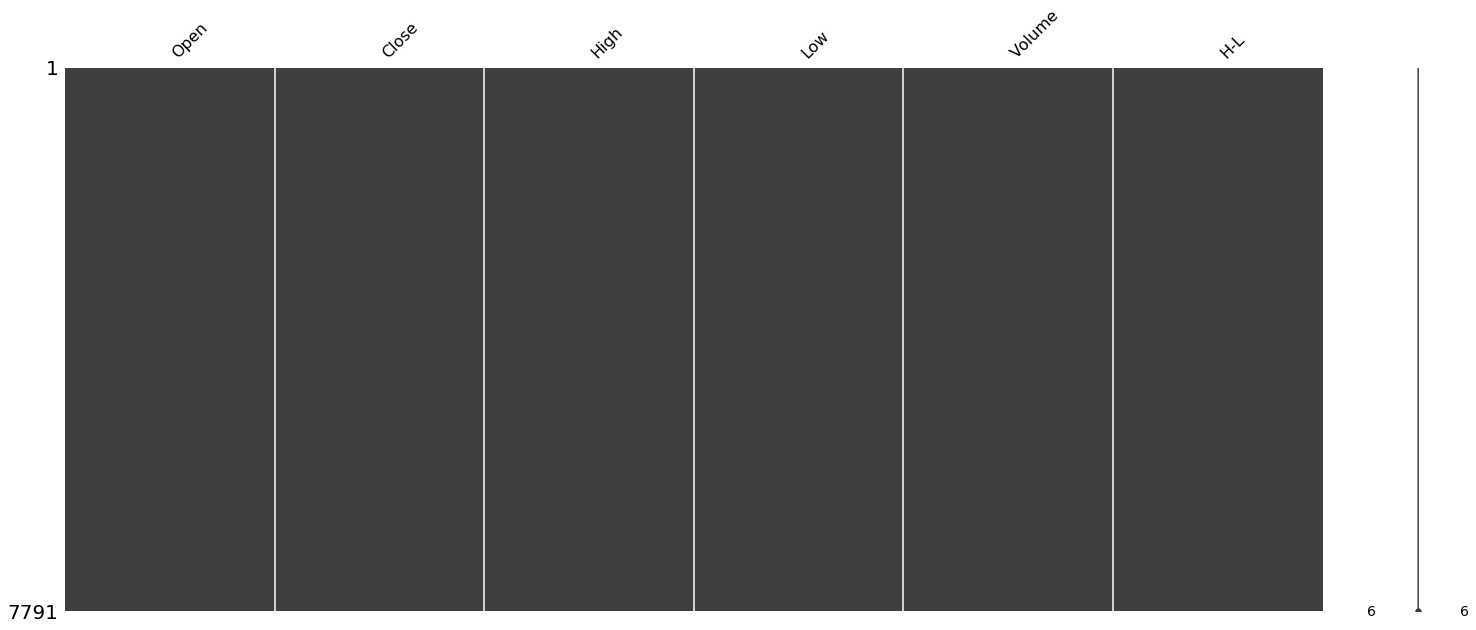

In [6]:
#!/usr/bin/python3

import base64
import clusterlib
import dash
import dash_core_components as dcc
import dash_html_components as html
import dash_bootstrap_components as dbc
import dash_table
import datetime
import functions
import itertools
import json
import math
import matplotlib
import matplotlib.pyplot as plt
import numpy as np    
import os
import pandas as pd
import plotly.graph_objs as go
import scipy
import scipy.cluster.hierarchy as hac
import seaborn as sns
import re
import styles
import sys
import warnings
import yaml

from dash.dependencies import Output, Input, State
from dash.exceptions import PreventUpdate
from datetime import datetime, timedelta
from dt_help import Helper
from dt_read import DataProcessor
from jupyter_dash import JupyterDash
from pandas.plotting import register_matplotlib_converters
from plotly.subplots import make_subplots
from scipy import stats
from scipy.cluster.hierarchy import cophenet, fcluster
from scipy.spatial.distance import pdist
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from plotly.figure_factory import create_2d_density

warnings.filterwarnings('ignore',category=FutureWarning)
pd.options.mode.chained_assignment = None 
register_matplotlib_converters()

####################################################################################################################################################################################
#                                                                                            raw data                                                                              # 
####################################################################################################################################################################################
    
df_hk_daily, df_nikkei_daily, df_spmini500_daily, df_eustoxx50_daily, df_vix_daily, \
df_hk_minute, df_nikkei_minute, df_spmini500_minute, df_eustoxx50_minute, df_vix_minute, \
hk_daily_dates,nikkei_daily_dates,spmini_daily_dates,eu_daily_dates,vix_daily_dates, \
hk_minute_dates,nikkei_minute_dates,spmini_minute_dates,eu_minute_dates,vix_minute_dates = functions.get_data_all()

cut_cluster, cut_cluster_num, max_cluster_rep = functions.get_conf_helper()
options_max_cluster = [{'label': i, 'value': i} for i in range(int(max_cluster_rep))]

def get_df_choice(freq,index_val):
    if(freq == 'daily' and index_val=='HangSeng'):
        df = df_hk_daily
    elif(freq == 'daily' and index_val == 'Nikkei225'):
        df = df_nikkei_daily
    elif(freq == 'daily' and index_val == 'eMiniSP500'):
        df = df_spmini500_daily
    elif(freq == 'daily' and index_val == 'EuroStoxx50'):
        df = df_eustoxx50_daily
    elif(freq == 'daily' and index_val == 'VIX'):
        df = df_vix_daily
    elif(freq == '15min' and index_val == 'HangSeng'):
        df = df_hk_minute
    elif(freq == '15min' and index_val == 'Nikkei225'):
        df = df_nikkei_minute
    elif(freq == '15min' and index_val == 'eMiniSP500'):
        df = df_spmini500_minute
    elif(freq == '15min' and index_val == 'EuroStoxx50'):
        df = df_eustoxx50_minute
    elif(freq == '15min' and index_val == 'VIX'):
        df = df_vix_minute
    return(df)

def all_common_dates():
    start_date_minute = pd.to_datetime('2020-01-06 00:00:00').tz_localize('UTC')
    end_date_minute = pd.to_datetime('2020-06-01 23:59:59').tz_localize('UTC')
   
    # find daily dates that are common to all indices (filtering out holdidays included in one market but not the other for example)
    start_date_daily = pd.to_datetime('2020-'"{:02d}"'-'"{:02d}".format(start_date_minute.month,start_date_minute.day))
    end_date_daily = pd.to_datetime('2020-'"{:02d}"'-'"{:02d}".format(end_date_minute.month,end_date_minute.day))

    days_hk = pd.DataFrame(hk_daily_dates[hk_daily_dates >= start_date_daily])
    days_nk = pd.DataFrame(nikkei_daily_dates[nikkei_daily_dates >= start_date_daily])
    days_sp = pd.DataFrame(spmini_daily_dates[spmini_daily_dates >= start_date_daily])
    days_eu = pd.DataFrame(eu_daily_dates[eu_daily_dates >= start_date_daily])

    tmp_hk = [ pd.to_datetime(el) for el in days_hk['Dates'].values ]
    tmp_nk = [ pd.to_datetime(el) for el in days_nk['Dates'].values ]
    tmp_sp = [ pd.to_datetime(el) for el in days_sp['Dates'].values ]
    tmp_eu = [ pd.to_datetime(el) for el in days_eu['Dates'].values ]

    days_hk_filter = [ "{:02d}"'-'"{:02d}"'-'"{:02d}".format(el.year,el.month,el.day) for el in tmp_hk ]
    days_nk_filter = [ "{:02d}"'-'"{:02d}"'-'"{:02d}".format(el.year,el.month,el.day) for el in tmp_nk ]
    days_sp_filter = [ "{:02d}"'-'"{:02d}"'-'"{:02d}".format(el.year,el.month,el.day) for el in tmp_sp ]
    days_eu_filter = [ "{:02d}"'-'"{:02d}"'-'"{:02d}".format(el.year,el.month,el.day) for el in tmp_eu ]
    
    elements_in_all = list(set.intersection(*map(set, [days_hk_filter,days_nk_filter,days_sp_filter,days_eu_filter])))

    days_all = sorted(elements_in_all, key=lambda x: datetime.strptime(x, '%Y-%m-%d'))
    days_all = [pd.to_datetime(el) for el in days_all]
    return(days_all)

#####################################################################################################################################################################################
    
def table_stats_ohlc(df_hk,df_nk,df_sp,df_eu,ohlc):
    days_all = all_common_dates()
    
    # for each daily date take a full 24hr session (for all indices)
    stats_all = []
    for el in days_all:
        sd = pd.to_datetime(str(el.date()) + ' 00:00:00').tz_localize('UTC')
        ed = pd.to_datetime(str(el.date()) + ' 23:59:59').tz_localize('UTC')
        
        mask_hk = (df_hk.index >= sd) & (df_hk.index <= ed)
        mask_nk = (df_nk.index >= sd) & (df_nk.index <= ed)
        mask_sp = (df_sp.index >= sd) & (df_sp.index <= ed)
        mask_eu = (df_eu.index >= sd) & (df_eu.index <= ed)

        df_hk_select = df_hk.loc[mask_hk]
        df_nk_select = df_nk.loc[mask_nk]
        df_sp_select = df_sp.loc[mask_sp]
        df_eu_select = df_eu.loc[mask_eu]

        stats_all.append(functions.stats_ohlc(df_hk_select,df_nk_select,df_sp_select,df_eu_select,el,ohlc))

    df_all = pd.concat(stats_all,axis=0,ignore_index=True)
    return(df_all)

#####################################################################################################################################################################################
    
def get_all_first_last(df_hk,df_nk,df_sp,df_eu,ohlc,hours_diff):
    days_all = all_common_dates()

    df_all_last_hang = pd.DataFrame(index=range(len(days_all)),columns=['Dates','growth'])
    df_all_last_nikkei = pd.DataFrame(index=range(len(days_all)),columns=['Dates','growth'])
    df_all_last_spmini500 = pd.DataFrame(index=range(len(days_all)),columns=['Dates','growth'])
    df_all_last_eustoxx50 = pd.DataFrame(index=range(len(days_all)),columns=['Dates','growth'])

    df_all_first_hang = pd.DataFrame(index=range(len(days_all)),columns=['Dates','growth'])
    df_all_first_nikkei = pd.DataFrame(index=range(len(days_all)),columns=['Dates','growth'])
    df_all_first_spmini500 = pd.DataFrame(index=range(len(days_all)),columns=['Dates','growth'])
    df_all_first_eustoxx50 = pd.DataFrame(index=range(len(days_all)),columns=['Dates','growth'])
    
    # for each daily date take a full 24hr session (for all indices)
    for i,el in enumerate(days_all):
        sd_hang = pd.to_datetime(str(el.date()) + ' 01:45:00').tz_localize('UTC')
        ed_hang = pd.to_datetime(str(el.date()) + ' 08:00:00').tz_localize('UTC')

        sd_nikkei = pd.to_datetime(str(el.date()) + ' 00:00:00').tz_localize('UTC')
        ed_nikkei = pd.to_datetime(str(el.date()) + ' 06:00:00').tz_localize('UTC')

        sd_spmini500 = pd.to_datetime(str(el.date()) + ' 13:30:00').tz_localize('UTC')
        ed_spmini500 = pd.to_datetime(str(el.date()) + ' 20:00:00').tz_localize('UTC')

        sd_eustoxx50 = pd.to_datetime(str(el.date()) + ' 07:00:00').tz_localize('UTC')
        ed_eustoxx50 = pd.to_datetime(str(el.date()) + ' 15:30:00').tz_localize('UTC')
        
        mask_hang = (df_hk.index >= sd_hang) & (df_hk.index <= ed_hang)
        mask_nikkei = (df_nk.index >= sd_nikkei) & (df_nk.index <= ed_nikkei)
        mask_spmini500 = (df_sp.index >= sd_spmini500) & (df_sp.index <= ed_spmini500)
        mask_eustoxx50 = (df_eu.index >= sd_eustoxx50) & (df_eu.index <= ed_eustoxx50)

        df_hang_select = df_hk.loc[mask_hang]
        df_nikkei_select = df_nk.loc[mask_nikkei]
        df_spmini500_select = df_sp.loc[mask_spmini500]
        df_eustoxx50_select = df_eu.loc[mask_eustoxx50]

        df_hang_select['rate_ret'] = df_hang_select[ohlc].pct_change().dropna()
        df_nikkei_select['rate_ret'] = df_nikkei_select[ohlc].pct_change().dropna()       
        df_spmini500_select['rate_ret'] = df_spmini500_select[ohlc].pct_change().dropna()       
        df_eustoxx50_select['rate_ret'] = df_eustoxx50_select[ohlc].pct_change().dropna()
        
        # get the last 'hours_diff' hours
        mask_hang_last = (df_hang_select.index >= df_hang_select.index[-1]-timedelta(hours=hours_diff, minutes=00, seconds=00))
        mask_nikkei_last = (df_nikkei_select.index >= df_nikkei_select.index[-1]-timedelta(hours=hours_diff, minutes=00, seconds=00))
        mask_spmini500_last = (df_spmini500_select.index >= df_spmini500_select.index[-1]-timedelta(hours=hours_diff, minutes=00, seconds=00))
        mask_eustoxx50_last = (df_eustoxx50_select.index >= df_eustoxx50_select.index[-1]-timedelta(hours=hours_diff, minutes=00, seconds=00))

        df_hang_select_last = df_hang_select.loc[mask_hang_last]
        df_nikkei_select_last = df_nikkei_select.loc[mask_nikkei_last]
        df_spmini500_select_last = df_spmini500_select.loc[mask_spmini500_last]
        df_eustoxx50_select_last = df_eustoxx50_select.loc[mask_eustoxx50_last]

        # get cumulative returns of the last 'hours_diff' hours
        df_hang_select_last['growth'] = (1.0+df_hang_select_last['rate_ret']).cumprod()
        df_hang_select_last['growth'].iloc[0] = 1
        res_hang_1 = df_hang_select_last[[el for el in df_hang_select_last.columns if 'growth' in el]].iloc[-1].values[0]
        res_hang_2 = df_hang_select_last[[el for el in df_hang_select_last.columns if 'growth' in el]].iloc[0].values[0]
        growth_hang = res_hang_1/res_hang_2 - 1.0
        
        df_nikkei_select_last['growth'] = (1.0+df_nikkei_select_last['rate_ret']).cumprod()
        df_nikkei_select_last['growth'].iloc[0] = 1
        res_nikkei_1 = df_nikkei_select_last[[el for el in df_nikkei_select_last.columns if 'growth' in el]].iloc[-1].values[0]
        res_nikkei_2 = df_nikkei_select_last[[el for el in df_nikkei_select_last.columns if 'growth' in el]].iloc[0].values[0]
        growth_nikkei = res_nikkei_1/res_nikkei_2 - 1.0

        df_spmini500_select_last['growth'] = (1.0+df_spmini500_select_last['rate_ret']).cumprod()
        df_spmini500_select_last['growth'].iloc[0] = 1
        res_spmini500_1 = df_spmini500_select_last[[el for el in df_spmini500_select_last.columns if 'growth' in el]].iloc[-1].values[0]
        res_spmini500_2 = df_spmini500_select_last[[el for el in df_spmini500_select_last.columns if 'growth' in el]].iloc[0].values[0]
        growth_spmini500 = res_spmini500_1/res_spmini500_2 - 1.0

        df_eustoxx50_select_last['growth'] = (1.0+df_eustoxx50_select_last['rate_ret']).cumprod()
        df_eustoxx50_select_last['growth'].iloc[0] = 1
        res_eustoxx50_1 = df_eustoxx50_select_last[[el for el in df_eustoxx50_select_last.columns if 'growth' in el]].iloc[-1].values[0]
        res_eustoxx50_2 = df_eustoxx50_select_last[[el for el in df_eustoxx50_select_last.columns if 'growth' in el]].iloc[0].values[0]
        growth_eustoxx50 = res_eustoxx50_1/res_eustoxx50_2 - 1.0

        df_all_last_hang.iloc[i] = ["{:02d}"'-'"{:02d}"'-'"{:02d}".format(el.year,el.month,el.day),growth_hang]
        df_all_last_nikkei.iloc[i] = ["{:02d}"'-'"{:02d}"'-'"{:02d}".format(el.year,el.month,el.day),growth_nikkei]
        df_all_last_spmini500.iloc[i] = ["{:02d}"'-'"{:02d}"'-'"{:02d}".format(el.year,el.month,el.day),growth_spmini500]
        df_all_last_eustoxx50.iloc[i] = ["{:02d}"'-'"{:02d}"'-'"{:02d}".format(el.year,el.month,el.day),growth_eustoxx50]

        # get the first 'hours_diff' hours
        mask_hang_first = (df_hang_select.index <= df_hang_select.index[0]+timedelta(hours=hours_diff, minutes=00, seconds=00))
        mask_nikkei_first = (df_nikkei_select.index <= df_nikkei_select.index[0]+timedelta(hours=hours_diff, minutes=00, seconds=00))
        mask_spmini500_first = (df_spmini500_select.index <= df_spmini500_select.index[0]+timedelta(hours=hours_diff, minutes=00, seconds=00))
        mask_eustoxx50_first = (df_eustoxx50_select.index <= df_eustoxx50_select.index[0]+timedelta(hours=hours_diff, minutes=00, seconds=00))

        df_hang_select_first = df_hang_select.loc[mask_hang_first]
        df_nikkei_select_first = df_nikkei_select.loc[mask_nikkei_first]
        df_spmini500_select_first = df_spmini500_select.loc[mask_spmini500_first]
        df_eustoxx50_select_first = df_eustoxx50_select.loc[mask_eustoxx50_first]

        # get cumulative returns of the first 'hours_diff' hours
        df_hang_select_first['growth'] = (1.0+df_hang_select_first['rate_ret']).cumprod()
        df_hang_select_first['growth'].iloc[0] = 1
        res_hang_1 = df_hang_select_first[[el for el in df_hang_select_first.columns if 'growth' in el]].iloc[-1].values[0]
        res_hang_2 = df_hang_select_first[[el for el in df_hang_select_first.columns if 'growth' in el]].iloc[0].values[0]
        growth_hang = res_hang_1/res_hang_2 - 1.0
        
        df_nikkei_select_first['growth'] = (1.0+df_nikkei_select_first['rate_ret']).cumprod()
        df_nikkei_select_first['growth'].iloc[0] = 1
        res_nikkei_1 = df_nikkei_select_first[[el for el in df_nikkei_select_first.columns if 'growth' in el]].iloc[-1].values[0]
        res_nikkei_2 = df_nikkei_select_first[[el for el in df_nikkei_select_first.columns if 'growth' in el]].iloc[0].values[0]
        growth_nikkei = res_nikkei_1/res_nikkei_2 - 1.0

        df_spmini500_select_first['growth'] = (1.0+df_spmini500_select_first['rate_ret']).cumprod()
        df_spmini500_select_first['growth'].iloc[0] = 1
        res_spmini500_1 = df_spmini500_select_first[[el for el in df_spmini500_select_first.columns if 'growth' in el]].iloc[-1].values[0]
        res_spmini500_2 = df_spmini500_select_first[[el for el in df_spmini500_select_first.columns if 'growth' in el]].iloc[0].values[0]
        growth_spmini500 = res_spmini500_1/res_spmini500_2 - 1.0

        df_eustoxx50_select_first['growth'] = (1.0+df_eustoxx50_select_first['rate_ret']).cumprod()
        df_eustoxx50_select_first['growth'].iloc[0] = 1
        res_eustoxx50_1 = df_eustoxx50_select_first[[el for el in df_eustoxx50_select_first.columns if 'growth' in el]].iloc[-1].values[0]
        res_eustoxx50_2 = df_eustoxx50_select_first[[el for el in df_eustoxx50_select_first.columns if 'growth' in el]].iloc[0].values[0]
        growth_eustoxx50 = res_eustoxx50_1/res_eustoxx50_2 - 1.0

        df_all_first_hang.iloc[i] = ["{:02d}"'-'"{:02d}"'-'"{:02d}".format(el.year,el.month,el.day),growth_hang]
        df_all_first_nikkei.iloc[i] = ["{:02d}"'-'"{:02d}"'-'"{:02d}".format(el.year,el.month,el.day),growth_nikkei]
        df_all_first_spmini500.iloc[i] = ["{:02d}"'-'"{:02d}"'-'"{:02d}".format(el.year,el.month,el.day),growth_spmini500]
        df_all_first_eustoxx50.iloc[i] = ["{:02d}"'-'"{:02d}"'-'"{:02d}".format(el.year,el.month,el.day),growth_eustoxx50]
    
    df_all_last_hang.set_index('Dates',inplace=True)
    df_all_last_nikkei.set_index('Dates',inplace=True)
    df_all_last_spmini500.set_index('Dates',inplace=True)
    df_all_last_eustoxx50.set_index('Dates',inplace=True)

    df_all_first_hang.set_index('Dates',inplace=True)
    df_all_first_nikkei.set_index('Dates',inplace=True)
    df_all_first_spmini500.set_index('Dates',inplace=True)
    df_all_first_eustoxx50.set_index('Dates',inplace=True)

    return(df_all_last_hang,df_all_last_nikkei,df_all_last_spmini500,df_all_last_eustoxx50,
           df_all_first_hang,df_all_first_nikkei,df_all_first_spmini500,df_all_first_eustoxx50)


def stats_dataframes(ohlc,days_all):
    df_hang_select_all = []
    df_nikkei_select_all = []
    df_spmini500_select_all = []
    df_eustoxx50_select_all = []
    
    # for each daily date take a full 24hr session (for all indices)
    for i,el in enumerate(days_all):
        sd = pd.to_datetime(str(el.date()) + ' 00:00:00').tz_localize('UTC')
        ed = pd.to_datetime(str(el.date()) + ' 23:59:59').tz_localize('UTC')
        
        mask_hang = (df_hk_minute.index >= sd) & (df_hk_minute.index <= ed)
        mask_nikkei = (df_nikkei_minute.index >= sd) & (df_nikkei_minute.index <= ed)
        mask_spmini500 = (df_spmini500_minute.index >= sd) & (df_spmini500_minute.index <= ed)
        mask_eustoxx50 = (df_eustoxx50_minute.index >= sd) & (df_eustoxx50_minute.index <= ed)

        df_hang_select = df_hk_minute.loc[mask_hang]
        df_nikkei_select = df_nikkei_minute.loc[mask_nikkei]
        df_spmini500_select = df_spmini500_minute.loc[mask_spmini500]
        df_eustoxx50_select = df_eustoxx50_minute.loc[mask_eustoxx50]

        df_hang_select['rate_ret'] = df_hang_select[ohlc].pct_change()
        df_nikkei_select['rate_ret'] = df_nikkei_select[ohlc].pct_change()
        df_spmini500_select['rate_ret'] = df_spmini500_select[ohlc].pct_change()
        df_eustoxx50_select['rate_ret'] = df_eustoxx50_select[ohlc].pct_change()

        df_hang_select.dropna(inplace=True)
        df_nikkei_select.dropna(inplace=True)
        df_spmini500_select.dropna(inplace=True)
        df_eustoxx50_select.dropna(inplace=True)

        df_hang_select_all.append(df_hang_select['rate_ret'].T)
        df_nikkei_select_all.append(df_nikkei_select['rate_ret'].T)
        df_spmini500_select_all.append(df_spmini500_select['rate_ret'].T)
        df_eustoxx50_select_all.append(df_eustoxx50_select['rate_ret'].T)
        
    return(df_hang_select_all,df_nikkei_select_all,df_spmini500_select_all,df_eustoxx50_select_all)

def stats_dataframes_ohlc(ohlc,days_all):
    df_hang_select_all = []
    df_nikkei_select_all = []
    df_spmini500_select_all = []
    df_eustoxx50_select_all = []
    
    # for each daily date take a full 24hr session (for all indices)
    for i,el in enumerate(days_all):
        sd = pd.to_datetime(str(el.date()) + ' 00:00:00').tz_localize('UTC')
        ed = pd.to_datetime(str(el.date()) + ' 23:59:59').tz_localize('UTC')
        
        mask_hang = (df_hk_minute.index >= sd) & (df_hk_minute.index <= ed)
        mask_nikkei = (df_nikkei_minute.index >= sd) & (df_nikkei_minute.index <= ed)
        mask_spmini500 = (df_spmini500_minute.index >= sd) & (df_spmini500_minute.index <= ed)
        mask_eustoxx50 = (df_eustoxx50_minute.index >= sd) & (df_eustoxx50_minute.index <= ed)

        df_hang_select = df_hk_minute.loc[mask_hang]
        df_nikkei_select = df_nikkei_minute.loc[mask_nikkei]
        df_spmini500_select = df_spmini500_minute.loc[mask_spmini500]
        df_eustoxx50_select = df_eustoxx50_minute.loc[mask_eustoxx50]

        df_hang_select['norm'] = (df_hang_select[ohlc].values - np.mean(df_hang_select[ohlc].values)) / np.max(df_hang_select[ohlc].values)
        df_nikkei_select['norm'] = (df_nikkei_select[ohlc].values - np.mean(df_nikkei_select[ohlc].values)) / np.max(df_nikkei_select[ohlc].values)
        df_spmini500_select['norm'] = (df_spmini500_select[ohlc].values - np.mean(df_spmini500_select[ohlc].values)) / np.max(df_spmini500_select[ohlc].values)  
        df_eustoxx50_select['norm'] = (df_eustoxx50_select[ohlc].values - np.mean(df_eustoxx50_select[ohlc].values)) / np.max(df_eustoxx50_select[ohlc].values) 
        
        df_hang_select_all.append(df_hang_select)
        df_nikkei_select_all.append(df_nikkei_select)
        df_spmini500_select_all.append(df_spmini500_select)
        df_eustoxx50_select_all.append(df_eustoxx50_select)
        
    return(df_hang_select_all,df_nikkei_select_all,df_spmini500_select_all,df_eustoxx50_select_all)


##########################################################################################################################################################################################
#                                                                                        layout_1
##########################################################################################################################################################################################
def get_layout_1():
    html_res = \
    html.Div([
              html.Div([
                        html.Div(html.P([html.Br(),html.H2(html.B('For each chosen index, different metrics are shown. The moving average represented in the graph is based on the Close value. It is also possible to show for different backward windows. We notice that the most active sessions start from March and span along this month')),html.Br(),html.H2(html.B('For Nikkei, the daily trend in terms of volume activity shows, during each cycle, the same pattern: a peak and gradual decrease')),html.Br(),html.H2(html.B('For Hang Seng, the daily trend in terms of volume activity shows a parabolic evolution during each cycle')),html.Br(),html.H2(html.B('For SP500, the daily trend in terms of volume activity shows a net uniform trend during half of a 24hr cycle and lesser activity during the other half and is similar for EuroStoxx50'))]), style=styles.STYLE_8),
                        html.Div([
                                  html.Div(html.H4('Frequency'),style=styles.STYLE_6),
                                  dcc.Dropdown(
                                      id='ohlc-dd-freq',
                                      options=[{'label': i, 'value': i} for i in ['daily','15min']],
                                      value='15min',
                                      style=styles.STYLE_2
                                      )
                                      ],style=styles.STYLE_9),
                        html.Div([
                                  html.Div(html.H4('Index choice'),style=styles.STYLE_6),
                                  dcc.Dropdown(
                                      id='ohlc-dd-index',
                                      options=[{'label': i, 'value': i} for i in ['Nikkei225','HangSeng','eMiniSP500','EuroStoxx50','VIX']],
                                      value='Nikkei225',
                                      style=styles.STYLE_2
                                      )
                                      ],style=styles.STYLE_9),
                        html.Div([
                                  html.Div(html.H4('Moving average time window'),style=styles.STYLE_6),
                                  dcc.Dropdown(
                                      id='ohlc-dd-mvavg',
                                      options=[{'label': str(i//60)+'hr', 'value': str(i)+'T'} for i in [60,120,240,720,1440]],
                                      value='60T',
                                      style=styles.STYLE_2
                                      )
                                      ],style=styles.STYLE_9),
                        html.Div([
                                  dcc.Graph(
                                      id = 'ohlc',
                                      style=styles.STYLE_4)
                                      ])
                                      ])
              ])
    return(html_res)

##########################################################################################################################################################################################
#                                                                                        layout_2
##########################################################################################################################################################################################
def get_layout_2():
    html_res = \
    html.Div([
              html.Div([
                        html.Div(html.P([html.Br(),html.H2(html.B('Now we look at the corrleation between the OHLCV componenent of each index. These price components (OHLC) are then selected based on the chosen correlation threshold'))]), style=styles.STYLE_8)]),
              html.Div([
                        html.Div([
                                  html.Div(html.H3('Frequency'),style=styles.STYLE_6),
                                  dcc.Dropdown(
                                      id='htpp-dd-freq',
                                      options=[{'label': i, 'value': i} for i in ['daily','15min']],
                                      value='daily',
                                      style=styles.STYLE_2
                                      )
                                      ],style=styles.STYLE_3),
                        html.Div([
                                  html.Div(html.H3('threshold correlation'),style=styles.STYLE_6),
                                  dcc.Dropdown(
                                      id='htpp-dd-thrs',
                                      options=[{'label': i, 'value': i} for i in [round(el,2) for el in np.linspace(-1.0,1.0,21)]],
                                      value=0.9,
                                      style=styles.STYLE_2
                                      )
                                      ],style=styles.STYLE_3),
                        html.Div([
                                  dcc.Graph(
                                      id = 'corr',
                                      style=styles.STYLE_4)
                                      ]),
                        html.Div([
                                  html.Div(
                                      id='corr-table',
                                      className='tableDiv'
                                      )
                                  ],style=styles.STYLE_4),
                        ]),
              ])
    return(html_res)

##########################################################################################################################################################################################
#                                                                                        layout_3
##########################################################################################################################################################################################  
def get_layout_3():
    html_res = \
    html.Div([
              html.Div([
                        html.Div(html.P([html.Br(),html.H2(html.B('For each index, a date can be chosen for which the distributions for the 15 minute data are computed both for the relative return and the logarithmic return.')),html.Br(),html.H2(html.B('Once a choice is made on Index 1 and Index 2, then a corresponding day and month have to be chosen (relative to each index). For each of the dates selected a daily trading session session is uploaded and the returns for these are plotted vs each other to check on the relationship. This allows to select pairs from the Correlation page (selection made on their correlation threshold).'))]), style=styles.STYLE_8)
                        ]),
              html.Div([
                        html.Div([
                                  html.Div(html.H3('Index Choice - 1'),style=styles.STYLE_6),
                                  dcc.Dropdown(
                                      id='ret-dd-idx-1',
                                      options=[{'label': i, 'value': i} for i in ['Nikkei225','HangSeng','eMiniSP500','EuroStoxx50','VIX']],
                                      value='Nikkei225',
                                      style=styles.STYLE_2
                                      )
                                      ],style=styles.STYLE_3),
                        html.Div([
                                  html.Div(html.H3('Index Choice - 2'),style=styles.STYLE_6),
                                  dcc.Dropdown(
                                      id='ret-dd-idx-2',
                                      options=[{'label': i, 'value': i} for i in ['Nikkei225','HangSeng','eMiniSP500','EuroStoxx50','VIX']],
                                      value='eMiniSP500',
                                      style=styles.STYLE_2
                                      )
                                      ],style=styles.STYLE_3),
                     ]),
              html.Div([
                        html.Div([
                                  html.Div(html.H3('Day - 1'),style=styles.STYLE_6),
                                  dcc.Dropdown(
                                      id='ret-dd-day-1',
                                      options=[{'label': i, 'value': int(i)} for i in range(1,31)],
                                      value=5,
                                      style=styles.STYLE_2
                                      )
                                      ],style=styles.STYLE_10),
                        html.Div([
                                  html.Div(html.H3('Month - 1'),style=styles.STYLE_6),
                                  dcc.Dropdown(
                                      id='ret-dd-month-1',
                                      options=[{'label': i, 'value': int(i)} for i in range(1,7)],
                                      value=3,
                                      style=styles.STYLE_2
                                      )
                                      ],style=styles.STYLE_10),
                        html.Div([
                                  html.Div(html.H3('OHLC Choice - 1'),style=styles.STYLE_6),
                                  dcc.Dropdown(
                                      id='ret-dd-ohlc-1',
                                      options=[{'label': i, 'value': i} for i in ['Open','High','Low','Close']],
                                      value='Close',
                                      style=styles.STYLE_2
                                      )
                                      ],style=styles.STYLE_10),                        
                        html.Div([
                                  html.Div(html.H3('Day - 2'),style=styles.STYLE_6),
                                  dcc.Dropdown(
                                      id='ret-dd-day-2',
                                      options=[{'label': i, 'value': int(i)} for i in range(1,31)],
                                      value=5,
                                      style=styles.STYLE_2
                                      )
                                      ],style=styles.STYLE_10),
                        html.Div([
                                  html.Div(html.H3('Month - 2'),style=styles.STYLE_6),
                                  dcc.Dropdown(
                                      id='ret-dd-month-2',
                                      options=[{'label': i, 'value': int(i)} for i in range(1,7)],
                                      value=3,
                                      style=styles.STYLE_2
                                      )
                                      ],style=styles.STYLE_10),
                        html.Div([
                                  html.Div(html.H3('OHLC Choice - 2'),style=styles.STYLE_6),
                                  dcc.Dropdown(
                                      id='ret-dd-ohlc-2',
                                      options=[{'label': i, 'value': i} for i in ['Open','High','Low','Close']],
                                      value='Close',
                                      style=styles.STYLE_2
                                      )
                                      ],style=styles.STYLE_10),
                        html.Div([
                                  html.Div(html.P([html.Br(),html.H2(html.B('Simple return between indices at different dates')),html.Br()]), style=styles.STYLE_8),
                                  dcc.Graph(
                                      id = 'ret-dist-comp',
                                      style=styles.STYLE_4
                                      )
                                      ],style=styles.STYLE_3),
                        html.Div([
                                  html.Div(html.P([html.Br(),html.H2(html.B('Log-return between indices at different dates')),html.Br()]), style=styles.STYLE_8),
                                  dcc.Graph(
                                      id = 'log-ret-dist-comp',
                                      style=styles.STYLE_4
                                      )
                                      ],style=styles.STYLE_3),
                         ])
              ])
    
    return(html_res)

##########################################################################################################################################################################################
#                                                                                        layout_4
##########################################################################################################################################################################################  
def get_layout_4():
    html_res = \
    html.Div([
              html.Div([
              html.Div([
                        html.Div(html.P([html.Br(),html.H2(html.B('First we find all dates that are common to all indices. For each day, a full trading session span is selected. For each daily session and for each market')),html.Br(),html.H2(html.B('day_sess: date of the selected time span')),html.Br(),html.H2(html.B('st_sess: start of the session where the statistics are computed')),html.Br(),html.H2(html.B('ed_sess: end of the session where the statistics are computed')),html.Br(),html.H2(html.B('mdd: Maximum Drawdon during the daily session (expressed in %)')),html.Br(),html.H2(html.B('Volatility during the daily session (expressed in %)')),html.Br(),html.H2(html.B('growth: growth of the portfolio (computed as end/start value from the cumulative return -> cumprod(1+return)')),html.Br(),html.H2(html.B('max_ret_time: corresponds to the first time the maximum is reached')),html.Br(),html.H2(html.B('min_ret_time: corresponds to the first time the minimum is reached')),html.Br(),html.H2(html.B('mean_return during the daily session (expressed in %)')),html.Br(),html.H2(html.B('pos_return: shows if session returned positive or negative')),html.Br(),html.H2(html.B('up_ratio: number of up moves / total moves (in returns term, expressed in % of total moves)')),html.Br(),html.H2(html.B('down_ratio: number of down moves / total moves (in returns term, expressed in % of total moves)')),html.Br(),html.H2(html.B('index_market: name of the index')),html.Br(),html.H2(html.B('The table below gives all the statistics relative to returns and can be recalculated for each of the OHLC parameters. The table is also filterable/selectable/deletable and sortable')),html.Br(),html.H2(html.B('In the filter line expression such as ">value" can be written to filter out by specific range. Filter queries can be entered in the pop windows and then are automatically translated into full queries which can then be reused.'))]), style=styles.STYLE_8)
                        ]),
                        html.Div([
                                  html.Div(html.H3('OHLC Choice'),style=styles.STYLE_6),
                                  dcc.Dropdown(
                                      id='stats-dd-ohlc',
                                      options=[{'label': i, 'value': i} for i in ['Open','High','Low','Close']],
                                      value='Close',
                                      style=styles.STYLE_2
                                      )
                                      ],style=styles.STYLE_3),
                        html.Div([
                            html.Div(html.P([html.Br(),html.H5(html.B('')),html.Br(),html.H5(html.B(''))]), style=styles.STYLE_8)
                            ]),
                        html.Div([
                                  dcc.RadioItems(
                                      id='filter-query-read-write-stats',
                                      options=[
                                               {'label': 'Read filter_query', 'value': 'read'},
                                               {'label': 'Write to filter_query', 'value': 'write'}
                                               ],
                                      value='read'
                                      ),
                                  html.Br(),
                                  dcc.Input(id='filter-query-input-stats', placeholder='Enter filter query'),
                                  html.Div(id='filter-query-output-stats'),
                                  html.Hr()
                        ]),
                        html.Div([
                                  html.Div(id='stats-table-fig')
                                  ]),
                        html.Div([
                                  dash_table.DataTable(
                                      id = 'stats-table',                                                                            
                                      columns=[{'name': i, 'id': i, 'deletable': True, 'selectable': True} for i in ['day_sess', 'st_sess', 'ed_sess', 'mdd', 'volatility', 'growth','max_ret_time',
                                                                                                                     'min_ret_time', 'mean_return', 'pos_return', 'up_ratio', 'down_ratio', 'index_market']],
                                      data=[],
                                      editable = True,
                                      filter_action='native',
                                      sort_action='native',
                                      sort_mode='multi',
                                      column_selectable='multi',
                                      row_selectable='multi',
                                      row_deletable=True,
                                      selected_columns=[],
                                      selected_rows=[],
                                      page_action='native',
                                      page_size = styles.PAGE_SIZE,
                                      style_table={
                                          'width': '75%',
                                          'minWidth': '75%',
                                          },
                                      ),
                                  ]),
                        html.Hr(),
                        html.Div(id='datatable-query-structure-stats', style={'whitespace': 'pre'}),
                        html.Div(id='stats-df', style={'display': 'none'})
                       ])
              ])
    return(html_res)

##########################################################################################################################################################################################
#                                                                                        layout_5
##########################################################################################################################################################################################
def get_layout_5():
    html_res = \
    html.Div([
              html.Div([
                        html.Div(html.P([html.Br(),html.H2(html.B('Analysis of lag dependency between indices. Here we want to see how the different indices performance are related to each other, i.e. how the performance in terms of cumulative return on the first/last N hours of one index is related to the first/last N hours performance of another one. This comparison is performed for each day during more than a 6 months period with 15min sampled data.'))]), style=styles.STYLE_8)]),
              html.Div([
                        html.Div([
                                  html.Div(html.H3('OHLC Choice'),style=styles.STYLE_6),
                                  dcc.Dropdown(
                                      id='lag-dd-ohlc',
                                      options=[{'label': i, 'value': i} for i in ['Open','High','Low','Close']],
                                      value='Close',
                                      style=styles.STYLE_2
                                      )
                                      ],style=styles.STYLE_9),                        
                        html.Div([
                                  html.Div(html.H3('Hours differential'),style=styles.STYLE_6),
                                  dcc.Dropdown(
                                      id='lag-dd-hours-diff',
                                      options=[{'label': i, 'value': i} for i in range(2,12,2)],
                                      value=2,
                                      style=styles.STYLE_2
                                      )
                                      ],style=styles.STYLE_9),                        
                        html.Div([
                                  dcc.Graph(
                                      id = 'lag-fig',
                                      style=styles.STYLE_4)
                                      ]),
              html.Div([
                        html.Div(html.P([html.Br(),html.Br(),html.Br(),html.H2(html.B('The below table shows for each index pair (and their corresponding first/last N hours), how many times they have been in same or opposite direction. In average there are as many opposite as same movements in terms of directions.'))]), style=styles.STYLE_8)]),
                        html.Div([
                                  html.Div(
                                      id='lag-table',
                                      className='tableDiv'
                                      )
                                  ],style=styles.STYLE_4),
                        ]),
              ])
    return(html_res)
    
##########################################################################################################################################################################################
#                                                                                        layout_6
##########################################################################################################################################################################################
def get_layout_6():
    html_res = \
    html.Div([
        html.Div([
            html.Div(html.H3('OHLC choice'),style=styles.STYLE_6),
            dcc.Dropdown(
                id='ohlc-dropdown',
                options=[{'label': i, 'value': i} for i in ['Open','High', 'Low', 'Close']],
                value='Close',
                style=styles.STYLE_2
            )
            ],style=styles.STYLE_12),
        html.Div([
            html.Div(html.H3('Index choice'),style=styles.STYLE_6),
            dcc.Dropdown(
                id='index-dropdown',
                options=[{'label': i, 'value': i} for i in ['Hang Seng','Nikkei225','eMiniSP500','EuroStoxx50']],
                value='Nikkei225',
                style=styles.STYLE_2
            )
            ],style=styles.STYLE_12),
        html.Div([
            html.Div(html.H3('Cluster Method'),style=styles.STYLE_6),
            dcc.Dropdown(
                id='method-dropdown',
                options=[{'label': i, 'value': i} for i in ['single','complete','average','weighted','centroid','median','ward']],
                value='ward',
                style=styles.STYLE_2
            )
            ],style=styles.STYLE_12),
        html.Div([
            html.Div(html.H3('Cluster Metric'),style=styles.STYLE_6),
            dcc.Dropdown(
                id='metric-dropdown',
                options=[{'label': i, 'value': i} for i in ['euclidean','correlation','cosine','dtw']],
                value='euclidean',
                style=styles.STYLE_2
            )
            ],style=styles.STYLE_12),
        html.Div([
            html.Div(html.H3('Cluster max #'),style=styles.STYLE_6),
            dcc.Dropdown(
                id='max-cluster-dropdown',
                options=[{'label': i, 'value': i} for i in range(int(max_cluster_rep))],
                value=12,
                style=styles.STYLE_2
            )
            ],style=styles.STYLE_12),
        html.Div([
                  html.Div(html.P([html.Br(),html.Br(),html.Br(),html.Br(),html.Br(),html.H2(html.B('Although there was not strictly strong relationships bewteen the respective strategies and the external data (containing macro/index/commodities data, we cannot rule out completely that there could be a relationship between these time series. In fact in the assessment of the correlation matrix, we looked at common dates between the time series returns of the Strategy and the external data time series. However, there can be similarities between these time series, but hidden by the fact that the time series are shifted w.r.t each other. We look at this issue by way of clustering between the time series and introduce the Dynamic Time Warping (DTW) measure which is an elastic distance which warps two sequences non-linearly in time in order to cope with time deformations and varying speeds in time dependent data. This constrasts with other lock-step distance measures such as the Euclidean distance. In the present case we are looking at the similarity between the cumulative returns of the respective time series and the external data. We can notice that both strategies get clustered with emerging markets data along with gold. Note that the distance matrix has been computed using the DTW distance measure to account for similarity in shape between the time series. The results are robust to the clustering method, i.e. conserving the grouping of the time series. The value into parenthesis means that the are two time series at the end of the leaf of the dendrogram')),html.Br()]), style=styles.STYLE_8),
            html.Img(id = 'cluster-plot',
                           src = '',
                           style=styles.STYLE_4)
        ]),
        html.Div([
            html.Div(html.H3('Cluster Selected (only select those with cluster_size larger than 1 for the DTW analysis)'),style=styles.STYLE_6),
            dcc.Dropdown(
                id='selected-cluster-dropdown',
                value=12,
                style=styles.STYLE_2
            )
        ]),
        html.Div(
            id='cluster-table',
            className='tableDiv'
        ),
        html.Div([
            html.Div(html.P([html.Br(),html.H2(html.B('Dynamic time warping distance between pairs from selected cluster. The closer this distance is to 0, the more similar are the pairs'))]), style=styles.STYLE_8),
            html.Img(id = 'dtws-uniq-plot',
                           src = '',
                           style=styles.STYLE_4)
        ]),
    ])
    return(html_res)

##########################################################################################################################################################################################
#                                                                                        layout_7
##########################################################################################################################################################################################
def get_layout_7():
    html_res = \
    html.Div([
        html.Div([
            html.Div(html.H3('OHLC choice'),style=styles.STYLE_6),
            dcc.Dropdown(
                id='ohlc-adf',
                options=[{'label': i, 'value': i} for i in ['Open','High', 'Low', 'Close']],
                value='Close',
                style=styles.STYLE_2
            )
            ],style=styles.STYLE_12),
    html.Div(html.P([html.Br(),html.Br(),html.Br(),html.Br(),html.Br(),html.Br(),html.H2(html.B('We look at the stationarity through the output of the Augmented Dickey-Fuller test. For each 24hr session, the minute data is used to apply the ADF test to. This is performed for each index. Then we show on the graph, all those dates that show a non-stationary behaviour are marked with a blue vertical line, no vetical line meaning (white) time series for that session is stationary. The table below the graph shows some quantitative output of the test.'))]), style=styles.STYLE_8),
    html.Div([
              html.Div(html.P([html.Br(),html.Br(),html.Br(),html.Br(),html.H2(html.B('Hang Seng'))]), style=styles.STYLE_8),
              dcc.Graph(
                  id = 'adf-fig-1',
                  style=styles.STYLE_13)
              ]),
    html.Div([
              html.Div(html.P([html.Br(),html.H2(html.B('Nikkei225'))]), style=styles.STYLE_8),
              dcc.Graph(
                  id = 'adf-fig-2',
                  style=styles.STYLE_13)
              ]),\
    html.Div([
              html.Div(html.P([html.Br(),html.H2(html.B('eMiniSP500'))]), style=styles.STYLE_8),
              dcc.Graph(
                  id = 'adf-fig-3',
                  style=styles.STYLE_13),
              ]),
    html.Div([
              html.Div(html.P([html.Br(),html.H2(html.B('EuroStoxx50'))]), style=styles.STYLE_8),
              dcc.Graph(
                  id = 'adf-fig-4',
                  style=styles.STYLE_13)
              ]),
    html.Div(
        html.Div(html.P([html.Br(),html.Br(),html.Br(),html.Br(),html.H2(html.B('Hang Seng'))]), style=styles.STYLE_8),
        id='adf-table-1',
        className='tableDiv'
        ),
    html.Div(
        html.Div(html.P([html.Br(),html.Br(),html.Br(),html.Br(),html.H2(html.B('Nikkei225'))]), style=styles.STYLE_8),
        id='adf-table-2',
        className='tableDiv'
        ),
    html.Div(
        html.Div(html.P([html.Br(),html.Br(),html.Br(),html.Br(),html.H2(html.B('eMiniSP500'))]), style=styles.STYLE_8),
        id='adf-table-3',
        className='tableDiv'
        ),
    html.Div(
        html.Div(html.P([html.Br(),html.Br(),html.Br(),html.Br(),html.H2(html.B('EuroStoxx50'))]), style=styles.STYLE_8),
        id='adf-table-4',
        className='tableDiv'
        ),
    ])
    return(html_res)

##########################################################################################################################################################################################
#                                                                                        layout_8
##########################################################################################################################################################################################
def get_layout_8():
    html_res = \
    html.Div([
    html.Div(html.P([html.Br(),html.Br(),html.Br(),html.Br(),html.Br(),html.Br(),html.H2(html.B('A recurrence plot (RP) is an image obtained from a time series, representing the distances between each time point. A recurrence plot gives information about the temporal correlation of phase space points. It shows for each moment i in time, the times at which a phase space trajectory visits the same area (in that phase space) as of time j. If x_t is a vector time series, the above definition translates into x_i~x_j (or x_i=x_j within an epsilon). A recurrence is a time the trajectory returns to a location it has visited before. Vertical and horizontal lines mean that the system changes slowly in time. Diagonal lines mean that trajectories passing in the same region of phase space at different times. Parallel and perpendicular lines to the main diagonal stand for some determinism or periodicity. If neither paralllel or nor perpendicular lines we are in a situation with a pure stochastic system. Arrow shapes account for on stationary systems with strong trend.' ))]), style=styles.STYLE_8),
   html.Div([
             html.Div(html.H3('OHLC choice'),style=styles.STYLE_6),
             dcc.Dropdown(
                 id='ohlc-recplot',
                 options=[{'label': i, 'value': i} for i in ['Open','High', 'Low', 'Close']],
                 value='Close',
                 style=styles.STYLE_2
                 ),
                 ],style=styles.STYLE_3),
   html.Div([
             html.Div(html.H3('Month value'),style=styles.STYLE_6),
             dcc.Dropdown(
                 id='month-recplot',
                 options=[{'label': i, 'value': i} for i in range(1,styles.MONTH_VALUE)],
                 value=1,
                 style=styles.STYLE_2
                 ),
                 ],style=styles.STYLE_3),
    html.Div([
              html.Div(html.P([html.Br(),html.Br(),html.Br(),html.Br(),html.H2(html.B('Hang Seng'))]), style=styles.STYLE_8),
              html.Img(id = 'recplot-fig-1',
                       src = '',
                       style=styles.STYLE_4)
              ]),
    html.Div([
              html.Div(html.P([html.Br(),html.H2(html.B('Nikkei225'))]), style=styles.STYLE_8),
              html.Img(id = 'recplot-fig-2',
                       src = '',
                       style=styles.STYLE_4)
              ]),
    html.Div([
              html.Div(html.P([html.Br(),html.H2(html.B('eMiniSP500'))]), style=styles.STYLE_8),
              html.Img(id = 'recplot-fig-3',
                       src = '',
                       style=styles.STYLE_4)
              ]),
    html.Div([
              html.Div(html.P([html.Br(),html.H2(html.B('EuroStoxx50'))]), style=styles.STYLE_8),
              html.Img(id = 'recplot-fig-4',
                       src = '',
                       style=styles.STYLE_4)
              ]),
    ])
    return(html_res)

##########################################################################################################################################################################################
#                                                                                        layout_9
##########################################################################################################################################################################################
def get_layout_9():
    html_res = \
    html.Div([
              html.Div([
                        html.Div([
                                  html.Div(html.H4('Frequency'),style=styles.STYLE_6),
                                  dcc.Dropdown(
                                      id='msno-freq',
                                      options=[{'label': i, 'value': i} for i in ['daily','15min']],
                                      value='15min',
                                      style=styles.STYLE_2
                                      )
                                      ],style=styles.STYLE_9),
                        html.Div([
                                  html.Div(html.H4('Index choice'),style=styles.STYLE_6),
                                  dcc.Dropdown(
                                      id='msno-index',
                                      options=[{'label': i, 'value': i} for i in ['Nikkei225','HangSeng','eMiniSP500','EuroStoxx50','VIX']],
                                      value='Nikkei225',
                                      style=styles.STYLE_2
                                      )
                                      ],style=styles.STYLE_9),
                        html.Div(html.P([html.Br(),html.Br(),html.Br(),html.Br(),html.Br(),html.Br(),html.Br(),html.Br(),html.H2(html.B('For the selected index and frequency we first look if there are missing values and if any their distribution.'))]), style=styles.STYLE_8)]),
              html.Div([
              html.Div([
                        html.Div(html.P([html.Br(),html.H3(html.B('Missing values for index'))]), style=styles.STYLE_8)]),
                        html.Div([
                                  html.Div(
                                      id='msno-info-index',
                                      className='tableDiv'
                                      )
                                  ],style=styles.STYLE_4),
              html.Div([
                        html.Div([
                                  html.Div(html.P([html.Br(),html.H3(html.B('Missing values representation using missingno module.'))]), style=styles.STYLE_8)
                                  ]),
                        html.Img(id = 'msno-fig-index', src = '',style=styles.STYLE_4)
                        ]),
            ])
    ])
    return(html_res)

##########################################################################################################################################################################################
#                                                                                        menu
##########################################################################################################################################################################################
    
def nav_menu():
    title_all = ["Raw plots", "Correlations","Distribution of returns","Statistics - OHLC","Lag effect",
                 "Clustering","Stationarity test","Recurrence plots", "Missing values"]
    links_all = [ dbc.NavLink(el, href='/page-'+str(i+1), id='page-'+str(i+1)+'-link', style=styles.STYLE_1) for i,el in enumerate(title_all) ] 
    nav = dbc.Nav(links_all,pills=True)
    return(nav)

###################
# core of the app #
###################
external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']
app = JupyterDash(__name__,external_stylesheets=[dbc.themes.BOOTSTRAP],meta_tags=[{"content": "width=device-width"}])
app.config.suppress_callback_exceptions = True
app.layout = html.Div([
    html.Div([
        html.H1(nav_menu())]),
    dcc.Location(id='url', refresh=False),
    html.Div(id='page-content'),    
    ],                     
)

@app.callback(
    [Output(f"page-{i}-link", "active") for i in range(1,styles.N_PAGES+1)],
    [Input("url", "pathname")],
)
def toggle_active_links(pathname):
    # if pathname == "/":
    #     return((True,)+(False,)*(N_PAGES-1))
    return [pathname == f"/page-{i}" for i in range(1,styles.N_PAGES+1)]

#################
# stats queries #  
#################
@app.callback(
    [Output('filter-query-input-stats', 'style'),
     Output('filter-query-output-stats', 'style')],
    [Input('filter-query-read-write-stats', 'value')]
)
def query_input_output(val):
    input_style = {'width': '100%'}
    output_style = {}
    if val == 'read':
        input_style.update(display='none')
        output_style.update(display='inline-block')
    else:
        input_style.update(display='inline-block')
        output_style.update(display='none')
    return(input_style, output_style)

@app.callback(
    Output('stats-table', 'filter_query'),
    [Input('filter-query-input-stats', 'value')]
)
def write_query(query):
    if query is None:
        return('')
    return(query)

@app.callback(
    Output('filter-query-output-stats', 'children'),
    [Input('stats-table', 'filter_query')]
)
def read_query(query):
    if query is None:
        return('No filter query')
    return dcc.Markdown('`filter_query = "{}"`'.format(query))

@app.callback(
    Output('datatable-query-structure-stats', 'children'),
    [Input('stats-table', 'derived_filter_query_structure')]
)
def display_query(query):
    if query is None:
        return('')
    return html.Details([
        html.Summary('Derived filter query structure'),
        html.Div(dcc.Markdown('''```json{}```'''.format(json.dumps(query, indent=4))))
    ])

@app.callback(
    Output('selected-cluster-dropdown', 'options'),
    [Input('max-cluster-dropdown', 'value')]
)
def update_cluster_dropdown(max_cluster_val):
    options=[{'label': opt, 'value': opt} for opt in range(1,int(max_cluster_val)+1)]
    return(options)

@app.callback(
    Output('metric-dropdown', 'options'),
    [Input('method-dropdown', 'value')]
)
def update_cluster_dropdown(method_dropdown_val):
    if(method_dropdown_val == 'centroid' or method_dropdown_val == 'median' or method_dropdown_val == 'ward'):
        options=[{'label': 'euclidean', 'value':'euclidean'}]
    else:
        options=[{'label': opt, 'value': opt} for opt in ['euclidean','correlation','cosine','dtw']]
    return(options)

##########################################################################################################################################################################################
#                                                                                        page_1
##########################################################################################################################################################################################
@app.callback(
    Output('ohlc-dd-mvavg', 'options'),
    [Input('ohlc-dd-freq', 'value')]
)
def update_mvavg_dropdown_1(freq):
    if(freq == 'daily'):
        options=[{'label': str(i)+'D', 'value': int(i)} for i in [15,30,60]]
    elif(freq == '15min'):
        options=[{'label': str(i//60)+'hr', 'value': str(i)+'T'} for i in [60,120,240,720,1440]]
    return(options)
   
page_1_layout = html.Div([ get_layout_1() ])

@app.callback(Output('ohlc', 'figure'),
              [Input('ohlc-dd-freq', 'value'),
               Input('ohlc-dd-index', 'value'),
               Input('ohlc-dd-mvavg', 'value'),],
)
def update_fig_1(freq,index_val,wnd):
    df = get_df_choice(freq,index_val)
    fig = functions.fig_raw_plot(df,freq,index_val,wnd)
    return(fig)

##########################################################################################################################################################################################
#                                                                                        page_2
##########################################################################################################################################################################################
page_2_layout = html.Div([ get_layout_2() ])

@app.callback([Output('corr', 'figure'),
               Output('corr-table', 'children')],
              [Input('htpp-dd-freq','value'),
               Input('htpp-dd-thrs', 'value')]
)              
def update_fig_2(freq,vthreshold):
    if(freq == 'daily'):
        mask_hk = (df_hk_daily.index >= pd.to_datetime('2020-05-09 00:00:00').tz_localize('UTC')) & (df_hk_daily.index < pd.to_datetime('2020-05-23 00:00:00').tz_localize('UTC'))
        mask_nikkei = (df_nikkei_daily.index >= pd.to_datetime('2020-05-09 00:00:00').tz_localize('UTC')) & (df_nikkei_daily.index < pd.to_datetime('2020-05-23 00:00:00').tz_localize('UTC'))
        mask_spmini500 = (df_spmini500_daily.index >= pd.to_datetime('2020-05-09 00:00:00').tz_localize('UTC')) & (df_spmini500_daily.index < pd.to_datetime('2020-05-23 00:00:00').tz_localize('UTC'))
        mask_eustoxx50 = (df_eustoxx50_daily.index >= pd.to_datetime('2020-05-09 00:00:00').tz_localize('UTC')) & (df_eustoxx50_daily.index < pd.to_datetime('2020-05-23 00:00:00').tz_localize('UTC'))
        mask_vix= (df_vix_daily.index >= pd.to_datetime('2020-05-09 00:00:00').tz_localize('UTC')) & (df_vix_daily.index < pd.to_datetime('2020-05-23 00:00:00').tz_localize('UTC'))

        df_hk_select = df_hk_daily.loc[mask_hk]
        df_nikkei_select = df_nikkei_daily.loc[mask_nikkei]
        df_spmini500_select = df_spmini500_daily.loc[mask_spmini500]
        df_eustoxx50_select = df_eustoxx50_daily.loc[mask_eustoxx50]
        df_vix_select = df_vix_daily.loc[mask_vix]
    elif(freq == '15min'):
        mask_hk = (df_hk_minute.index >= pd.to_datetime('2020-05-09 00:00:00').tz_localize('UTC')) & (df_hk_minute.index < pd.to_datetime('2020-05-23 00:00:00').tz_localize('UTC'))
        mask_nikkei = (df_nikkei_minute.index >= pd.to_datetime('2020-05-09 00:00:00').tz_localize('UTC')) & (df_nikkei_minute.index < pd.to_datetime('2020-05-23 00:00:00').tz_localize('UTC'))
        mask_spmini500 = (df_spmini500_minute.index >= pd.to_datetime('2020-05-09 00:00:00').tz_localize('UTC')) & (df_spmini500_minute.index < pd.to_datetime('2020-05-23 00:00:00').tz_localize('UTC'))
        mask_eustoxx50 = (df_eustoxx50_minute.index >= pd.to_datetime('2020-05-09 00:00:00').tz_localize('UTC')) & (df_eustoxx50_minute.index < pd.to_datetime('2020-05-23 00:00:00').tz_localize('UTC'))
        mask_vix= (df_vix_minute.index >= pd.to_datetime('2020-05-09 00:00:00').tz_localize('UTC')) & (df_vix_minute.index < pd.to_datetime('2020-05-23 00:00:00').tz_localize('UTC'))

        df_nikkei_select = df_nikkei_minute.loc[mask_nikkei]
        df_hk_select = df_hk_minute.loc[mask_hk]
        df_spmini500_select = df_spmini500_minute.loc[mask_spmini500]
        df_eustoxx50_select = df_eustoxx50_minute.loc[mask_eustoxx50]
        df_vix_select = df_vix_minute.loc[mask_vix]
        
    df_hk_select.columns = [ el+'_hk' for el in df_hk_select.columns ]
    df_nikkei_select.columns = [ el+'_nk' for el in df_nikkei_select.columns ]
    df_spmini500_select.columns = [ el+'_us' for el in df_spmini500_select.columns ]
    df_eustoxx50_select.columns = [ el+'_eu' for el in df_eustoxx50_select.columns ]
    df_vix_select.columns = [ el+'_vix' for el in df_vix_select.columns ]

    df_all = pd.concat([df_hk_select,df_nikkei_select,df_spmini500_select,df_eustoxx50_select,df_vix_select],axis=1).dropna()

    # correlation
    df_corr_all = df_all[[el for el in df_all.columns if 'H-L' not in el]]    
    fig_corr, corr_matrix_filtered = functions.data_pairheat(df_corr_all,'Correlation matrix for the time series of all indices',vthreshold)

    corr_matrix_dct = corr_matrix_filtered.unstack().to_dict()
    corr_matrix_dct = {k: v for k, v in corr_matrix_dct.items() if pd.Series(v).notna().all()}
    corr_matrix_dct_sorted = {k: v for k, v in sorted(corr_matrix_dct.items(), key=lambda x: x[1], reverse=True)}

    pairs_1 = [x[0] for x in list(corr_matrix_dct_sorted.keys())]
    pairs_2 = [x[1] for x in list(corr_matrix_dct_sorted.keys())]
    values = [ round(el,4) for el in list(corr_matrix_dct_sorted.values()) ]
    res = pd.DataFrame.from_dict({'pair_1': pairs_1,'pair_2': pairs_2,'correlation': values})  
    df_res_table = functions.df_to_table(res)
    
    return(fig_corr,df_res_table)

##########################################################################################################################################################################################
#                                                                                        page_3
##########################################################################################################################################################################################
page_3_layout = html.Div([ get_layout_3() ])

@app.callback([Output('ret-dist-comp', 'figure'),
               Output('log-ret-dist-comp', 'figure')],
              [Input('ret-dd-idx-1', 'value'),
               Input('ret-dd-idx-2', 'value'),
               Input('ret-dd-day-1', 'value'),
               Input('ret-dd-month-1', 'value'),
               Input('ret-dd-day-2', 'value'),
               Input('ret-dd-month-2', 'value'),
               Input('ret-dd-ohlc-1', 'value'),
               Input('ret-dd-ohlc-2', 'value')]
)
def update_fig_3(index_val_1,index_val_2,day_1,month_1,day_2,month_2,ohlc_1,ohlc_2):
    date_1_low = pd.to_datetime('2020-'"{:02d}"'-'"{:02d}".format(month_1,day_1)+' 00:00:00') 
    date_1_up = pd.to_datetime('2020-'"{:02d}"'-'"{:02d}".format(month_1,day_1)+' 23:59:59') 
    date_2_low = pd.to_datetime('2020-'"{:02d}"'-'"{:02d}".format(month_2,day_2)+' 00:00:00')
    date_2_up = pd.to_datetime('2020-'"{:02d}"'-'"{:02d}".format(month_2,day_2)+' 23:59:59')
    
    mask_date_hk_1 = (df_hk_minute.index >= date_1_low.tz_localize('UTC')) & (df_hk_minute.index <= date_1_up.tz_localize('UTC'))
    mask_date_hk_2 = (df_hk_minute.index >= date_2_low.tz_localize('UTC')) & (df_hk_minute.index <= date_2_up.tz_localize('UTC'))
    
    mask_date_nk_1 = (df_nikkei_minute.index >= date_1_low.tz_localize('UTC')) & (df_nikkei_minute.index <= date_1_up.tz_localize('UTC'))
    mask_date_nk_2 = (df_nikkei_minute.index >= date_2_low.tz_localize('UTC')) & (df_nikkei_minute.index <= date_2_up.tz_localize('UTC'))

    mask_date_sp_1 = (df_spmini500_minute.index >= date_1_low.tz_localize('UTC')) & (df_spmini500_minute.index <= date_1_up.tz_localize('UTC'))
    mask_date_sp_2 = (df_spmini500_minute.index >= date_2_low.tz_localize('UTC')) & (df_spmini500_minute.index <= date_2_up.tz_localize('UTC'))

    mask_date_eu_1 = (df_eustoxx50_minute.index >= date_1_low.tz_localize('UTC')) & (df_eustoxx50_minute.index <= date_1_up.tz_localize('UTC'))
    mask_date_eu_2 = (df_eustoxx50_minute.index >= date_2_low.tz_localize('UTC')) & (df_eustoxx50_minute.index <= date_2_up.tz_localize('UTC'))

    mask_date_vix_1 = (df_vix_minute.index >= date_1_low.tz_localize('UTC')) & (df_vix_minute.index <= date_1_up.tz_localize('UTC'))
    mask_date_vix_2 = (df_vix_minute.index >= date_2_low.tz_localize('UTC')) & (df_vix_minute.index <= date_2_up.tz_localize('UTC'))
    
    df_hk_date_1 = df_hk_minute.loc[mask_date_hk_1]
    df_hk_date_2 = df_hk_minute.loc[mask_date_hk_2]

    df_nk_date_1 = df_nikkei_minute.loc[mask_date_nk_1]
    df_nk_date_2 = df_nikkei_minute.loc[mask_date_nk_2]

    df_sp_date_1 = df_spmini500_minute.loc[mask_date_sp_1]
    df_sp_date_2 = df_spmini500_minute.loc[mask_date_sp_2]

    df_eu_date_1 = df_eustoxx50_minute.loc[mask_date_eu_1]
    df_eu_date_2 = df_eustoxx50_minute.loc[mask_date_eu_2]

    df_vix_date_1 = df_vix_minute.loc[mask_date_vix_1]
    df_vix_date_2 = df_vix_minute.loc[mask_date_vix_2]
    
    fig1,fig2 = functions.fig_dist_comp(index_val_1,index_val_2,df_hk_date_1,df_hk_date_2,
                                df_nk_date_1,df_nk_date_2,
                                df_sp_date_1,df_sp_date_2,
                                df_eu_date_1,df_eu_date_2,
                                df_vix_date_1,df_vix_date_2,
                                ohlc_1,ohlc_2)
    return(fig1,fig2)

##########################################################################################################################################################################################
#                                                                                        page_4
##########################################################################################################################################################################################
page_4_layout = html.Div([ get_layout_4() ])

@app.callback(Output('stats-table-fig', 'children'),
              [Input('stats-table', 'derived_virtual_data'),
               Input('stats-table', 'derived_virtual_selected_rows'),
               Input('stats-df', 'data')])
def update_graphs(rows, derived_virtual_selected_rows, stats_df):
    if derived_virtual_selected_rows is None:
        derived_virtual_selected_rows = []
    
    dff = pd.read_json(stats_df) if rows is None else pd.DataFrame(rows)
    colors = ['#7FDBFF' if i in derived_virtual_selected_rows else '#0074D9' for i in range(len(dff))]

    return([
            dcc.Graph(
                id=column,
                figure={
                    'data': [
                        {
                            'x': dff['day_sess'],
                            'y': dff[column],
                            'type': 'bar',
                            'marker': {'color': colors},
                        }
                        ],
                    'layout': {
                        'xaxis': {'automargin': True},
                        'yaxis': {
                        'automargin': True,
                        'title': {'text': column},
                        'barmode':'stack',
                        },
                        'height': 250,
                        },
                },
        )
        for column in ['mean_return','up_ratio','down_ratio','volatility', 'mdd'] if column in dff])

@app.callback(Output('stats-table', 'data'),
              [Input('stats-dd-ohlc', 'value')],
)
def get_dataframe_stats_0(ohlc):
    df_res = table_stats_ohlc(df_hk_minute,df_nikkei_minute,df_spmini500_minute,df_eustoxx50_minute,ohlc)
    return(df_res.to_dict('rows'))

@app.callback(Output('stats-df', 'data'),
              [Input('stats-dd-ohlc', 'value')],
)
def get_dataframe_stats_1(ohlc):
    df_res = table_stats_ohlc(df_hk_minute,df_nikkei_minute,df_spmini500_minute,df_eustoxx50_minute,ohlc)
    return(df_res.to_json())

##########################################################################################################################################################################################
#                                                                                        page_5
##########################################################################################################################################################################################
page_5_layout = html.Div([ get_layout_5() ])

@app.callback([Output('lag-fig', 'figure'),
               Output('lag-table', 'children')],
              [Input('lag-dd-ohlc', 'value'),
               Input('lag-dd-hours-diff', 'value')]
)              
def update_fig_5(ohlc,lag_hours):
    df_hk,df_nk,df_sp,df_eu,ohlc,hours_diff = df_hk_minute,df_nikkei_minute,df_spmini500_minute,df_eustoxx50_minute,ohlc,lag_hours
    
    df_all_last_hang,df_all_last_nikkei,df_all_last_spmini500,df_all_last_eustoxx50,df_all_first_hang,df_all_first_nikkei,df_all_first_spmini500,df_all_first_eustoxx50 = \
      get_all_first_last(df_hk,df_nk,df_sp,df_eu,ohlc,hours_diff)

    # dataframe with all data
    pairs_all = ['Hang_Seng_last','Nikkei225_last','eMiniSP500_last','EuroStoxx50_last',
                 'Hang_Seng_first','Nikkei225_first','eMiniSP500_first','EuroStoxx50_first']

    df_all_first_last = pd.concat([df_all_last_hang,df_all_last_nikkei,df_all_last_spmini500,df_all_last_eustoxx50,
                                   df_all_first_hang,df_all_first_nikkei,df_all_first_spmini500,df_all_first_eustoxx50],axis=1)
    df_all_first_last.columns = pairs_all
    
    pairs_comb = [ el[0]+'__'+el[1] for el in list(itertools.combinations(pairs_all,2)) ]
    pairs_dfs = [(df_all_last_hang, df_all_last_nikkei), (df_all_last_hang, df_all_last_spmini500), (df_all_last_hang, df_all_last_eustoxx50), (df_all_last_hang, df_all_first_hang),
                 (df_all_last_hang, df_all_first_nikkei), (df_all_last_hang, df_all_first_spmini500), (df_all_last_hang, df_all_first_eustoxx50),(df_all_last_nikkei, df_all_last_spmini500),
                 (df_all_last_nikkei, df_all_last_eustoxx50), (df_all_last_nikkei, df_all_first_hang), (df_all_last_nikkei, df_all_first_nikkei), (df_all_last_nikkei, df_all_first_spmini500),
                 (df_all_last_nikkei, df_all_first_eustoxx50), (df_all_last_spmini500, df_all_last_eustoxx50), (df_all_last_spmini500, df_all_first_hang), (df_all_last_spmini500, df_all_first_nikkei),
                 (df_all_last_spmini500, df_all_first_spmini500), (df_all_last_spmini500, df_all_first_eustoxx50),(df_all_last_eustoxx50, df_all_first_hang), (df_all_last_eustoxx50, df_all_first_nikkei),
                 (df_all_last_eustoxx50, df_all_first_spmini500), (df_all_last_eustoxx50, df_all_first_eustoxx50), (df_all_first_hang, df_all_first_nikkei), (df_all_first_hang, df_all_first_spmini500),
                 (df_all_first_hang, df_all_first_eustoxx50), (df_all_first_nikkei, df_all_first_spmini500), (df_all_first_nikkei, df_all_first_eustoxx50), (df_all_first_spmini500, df_all_first_eustoxx50)]

    dct_pairs = dict(zip(pairs_comb,pairs_dfs))

    df_summary = pd.DataFrame(index=pairs_comb,columns=['same direction','opposite direction'])
    for i,(k,v) in enumerate(dct_pairs.items()):
        res = np.sign(v[0]['growth'].multiply(v[1]['growth'],axis='index'))
        df_summary.iloc[i] = [len(res[res==1]),len(res[res==-1])]

    df_summary['pair_1'] = [el.split('__')[0] for el in df_summary.index]
    df_summary['pair_2'] = [el.split('__')[1] for el in df_summary.index]

    lag_table = functions.df_to_table(df_summary[::-1])
    
    # plot results
    data_1_last = [dict(
        type = 'bar',
        x = df_all_last_hang.index,
        y = df_all_last_hang['growth'],
        name = 'Hang Seng - Last',
    )]

    layout = dict()
    fig = dict(data=data_1_last,layout=layout)
    
    fig['layout'] = dict()
    fig['layout']['plot_bgcolor'] = 'rgb(250, 250, 250)'
    fig['layout']['xaxis'] = {'automargin': True}
    fig['layout']['yaxis'] = dict(automargin=True,title='cumulative return')
    fig['layout']['width'] = 1800
    fig['layout']['height'] = 1200

    data_2_last = dict(
        type = 'bar',
        x = df_all_last_nikkei.index,
        y = df_all_last_nikkei['growth'],
        name = 'Nikkei225 - Last',
    )

    data_3_last = dict(
        type = 'bar',
        x = df_all_last_spmini500.index,
        y = df_all_last_spmini500['growth'],
        name = 'eMini SP500 - Last',
    )

    data_4_last = dict(
        type = 'bar',
        x = df_all_last_eustoxx50.index,
        y = df_all_last_eustoxx50['growth'],
        name = 'Eurostoxx50 - Last',
    )

    # first
    data_1_first = dict(
        type = 'bar',
        x = df_all_first_hang.index,
        y = df_all_first_hang['growth'],
        name = 'Hang Seng - First',
    )
    
    data_2_first = dict(
        type = 'bar',
        x = df_all_first_nikkei.index,
        y = df_all_first_nikkei['growth'],
        name = 'Nikkei225 - First',
    )

    data_3_first = dict(
        type = 'bar',
        x = df_all_first_spmini500.index,
        y = df_all_first_spmini500['growth'],
        name = 'eMini SP500 - First',
    )

    data_4_first = dict(
        type = 'bar',
        x = df_all_first_eustoxx50.index,
        y = df_all_first_eustoxx50['growth'],
        name = 'Eurostoxx50 - First',
    )

    fig['data'].append(data_2_last)
    fig['data'].append(data_3_last)
    fig['data'].append(data_4_last)
    fig['data'].append(data_1_first)
    fig['data'].append(data_2_first)
    fig['data'].append(data_3_first)
    fig['data'].append(data_4_first)

    return(fig,lag_table)

##########################################################################################################################################################################################
#                                                                                        page_6
##########################################################################################################################################################################################
page_6_layout = html.Div([ get_layout_6() ])

@app.callback([Output('cluster-plot', 'src'),
               Output('cluster-table', 'children'),
               Output('dtws-uniq-plot', 'src'),
               ],
              [Input("index-dropdown", "value"),
               Input("ohlc-dropdown", "value"),
               Input("method-dropdown", "value"),
               Input("metric-dropdown", "value"),
               Input("max-cluster-dropdown", "value"),
               Input("selected-cluster-dropdown", "value")
              ]
)
def update_fig_6(index_val,ohlc,method,metric,max_cluster,selected_cluster):
    days_all = all_common_dates()
    
    df_hang_select_all = []
    df_nikkei_select_all = []
    df_spmini500_select_all = []
    df_eustoxx50_select_all = []
    
    # for each daily date take a full 24hr session (for all indices)
    for i,el in enumerate(days_all):
        sd = pd.to_datetime(str(el.date()) + ' 00:00:00').tz_localize('UTC')
        ed = pd.to_datetime(str(el.date()) + ' 23:59:59').tz_localize('UTC')
        
        mask_hang = (df_hk_minute.index >= sd) & (df_hk_minute.index <= ed)
        mask_nikkei = (df_nikkei_minute.index >= sd) & (df_nikkei_minute.index <= ed)
        mask_spmini500 = (df_spmini500_minute.index >= sd) & (df_spmini500_minute.index <= ed)
        mask_eustoxx50 = (df_eustoxx50_minute.index >= sd) & (df_eustoxx50_minute.index <= ed)

        df_hang_select = df_hk_minute.loc[mask_hang]
        df_nikkei_select = df_nikkei_minute.loc[mask_nikkei]
        df_spmini500_select = df_spmini500_minute.loc[mask_spmini500]
        df_eustoxx50_select = df_eustoxx50_minute.loc[mask_eustoxx50]

        df_hang_select['rate_ret'] = df_hang_select[ohlc].pct_change()
        df_nikkei_select['rate_ret'] = df_nikkei_select[ohlc].pct_change()
        df_spmini500_select['rate_ret'] = df_spmini500_select[ohlc].pct_change()
        df_eustoxx50_select['rate_ret'] = df_eustoxx50_select[ohlc].pct_change()

        df_hang_select.dropna(inplace=True)
        df_nikkei_select.dropna(inplace=True)
        df_spmini500_select.dropna(inplace=True)
        df_eustoxx50_select.dropna(inplace=True)

        df_hang_select_all.append(df_hang_select['rate_ret'].T)
        df_nikkei_select_all.append(df_nikkei_select['rate_ret'].T)
        df_spmini500_select_all.append(df_spmini500_select['rate_ret'].T)
        df_eustoxx50_select_all.append(df_eustoxx50_select['rate_ret'].T)

    df_hang_merge = pd.concat(df_hang_select_all,axis=1)
    df_nikkei_merge = pd.concat(df_nikkei_select_all,axis=1)
    df_spmini500_merge = pd.concat(df_spmini500_select_all,axis=1)
    df_eustoxx50_merge = pd.concat(df_eustoxx50_select_all,axis=1)

    df_hang_merge.fillna(0,inplace=True)
    df_nikkei_merge.fillna(0,inplace=True)
    df_spmini500_merge.fillna(0,inplace=True)
    df_eustoxx50_merge.fillna(0,inplace=True)

    df_hang_merge.columns = ["{:02d}"'-'"{:02d}".format(el.month,el.day)  for el in days_all ]
    df_nikkei_merge.columns = ["{:02d}"'-'"{:02d}".format(el.month,el.day)  for el in days_all ]
    df_spmini500_merge.columns = ["{:02d}"'-'"{:02d}".format(el.month,el.day)  for el in days_all ]
    df_eustoxx50_merge.columns = ["{:02d}"'-'"{:02d}".format(el.month,el.day)  for el in days_all ]

    if(index_val == 'Hang Seng'):
        encoded_image_0, df_res, encoded_image_1 = functions.cluster_draw(df_hang_merge.T, method, metric, max_cluster, selected_cluster, 5)
    elif(index_val == 'Nikkei225'):
        encoded_image_0, df_res, encoded_image_1 = functions.cluster_draw(df_nikkei_merge.T, method, metric, max_cluster, selected_cluster, 5)
    elif(index_val == 'eMiniSP500'):
        encoded_image_0, df_res, encoded_image_1 = functions.cluster_draw(df_spmini500_merge.T, method, metric, max_cluster, selected_cluster, 5)
    elif(index_val == 'EuroStoxx50'):
        encoded_image_0, df_res, encoded_image_1 = functions.cluster_draw(df_eustoxx50_merge.T, method, metric, max_cluster, selected_cluster, 5)
            
    cluster_html_table = functions.df_to_table(df_res)                                                                  
    return(encoded_image_0, cluster_html_table,encoded_image_1)

##########################################################################################################################################################################################
#                                                                                        page_7
##########################################################################################################################################################################################
page_7_layout = html.Div([ get_layout_7() ])

@app.callback([Output('adf-fig-1', 'figure'),
               Output('adf-fig-2', 'figure'),
               Output('adf-fig-3', 'figure'),
               Output('adf-fig-4', 'figure'),
               Output('adf-table-1', 'children'),
               Output('adf-table-2', 'children'),
               Output('adf-table-3', 'children'),
               Output('adf-table-4', 'children')],
              [Input("ohlc-adf", "value")]
)
def update_fig_7(ohlc):
    days_all = all_common_dates()
    df_hang_select_all,df_nikkei_select_all,df_spmini500_select_all,df_eustoxx50_select_all = stats_dataframes(ohlc,days_all)

    df_res_hang = pd.DataFrame.from_dict([ Helper.adfuller_test(el.values) for el in df_hang_select_all ])
    df_res_nikkei = pd.DataFrame.from_dict([ Helper.adfuller_test(el.values) for el in df_nikkei_select_all ])
    df_res_spmini500 = pd.DataFrame.from_dict([ Helper.adfuller_test(el.values) for el in df_spmini500_select_all ])
    df_res_eustoxx50 = pd.DataFrame.from_dict([ Helper.adfuller_test(el.values) for el in df_eustoxx50_select_all ])

    df_res_hang['Dates'] = [ "{:02d}"'-'"{:02d}"'-'"{:02d}".format(el.year,el.month,el.day) for el in days_all ]
    df_res_nikkei['Dates'] = [ "{:02d}"'-'"{:02d}"'-'"{:02d}".format(el.year,el.month,el.day) for el in days_all ]
    df_res_spmini500['Dates'] = [ "{:02d}"'-'"{:02d}"'-'"{:02d}".format(el.year,el.month,el.day) for el in days_all ]
    df_res_eustoxx50['Dates'] = [ "{:02d}"'-'"{:02d}"'-'"{:02d}".format(el.year,el.month,el.day) for el in days_all ]

    fig_1,fig_2,fig_3,fig_4 = functions.fig_adf(df_res_hang,df_res_nikkei,df_res_spmini500,df_res_eustoxx50)
    adf_html_table_hang = functions.df_to_table(df_res_hang.head())
    adf_html_table_nikkei = functions.df_to_table(df_res_nikkei.head())
    adf_html_table_spmini500 = functions.df_to_table(df_res_spmini500.head())
    adf_html_table_eustoxx50 = functions.df_to_table(df_res_eustoxx50.head())
    
    return(fig_1,fig_2,fig_3,fig_4,adf_html_table_hang,adf_html_table_nikkei,adf_html_table_spmini500,adf_html_table_eustoxx50)

##########################################################################################################################################################################################
#                                                                                        page_8
##########################################################################################################################################################################################
page_8_layout = html.Div([ get_layout_8() ])

@app.callback([Output('recplot-fig-1', 'src'),
               Output('recplot-fig-2', 'src'),
               Output('recplot-fig-3', 'src'),
               Output('recplot-fig-4', 'src')],
              [Input("ohlc-recplot", "value"),
               Input("month-recplot", "value")]
)
def update_fig_8(ohlc,month_val):
    days_all = all_common_dates()
    df_hang_select_all,df_nikkei_select_all,df_spmini500_select_all,df_eustoxx50_select_all = stats_dataframes_ohlc(ohlc,days_all)

    df_hang_merge = pd.concat(df_hang_select_all,axis=0) # .to_frame()
    df_nikkei_merge = pd.concat(df_nikkei_select_all,axis=0) # .to_frame()
    df_spmini500_merge = pd.concat(df_spmini500_select_all,axis=0) # .to_frame()
    df_eustoxx50_merge = pd.concat(df_eustoxx50_select_all,axis=0) # .to_frame()

    df_hang_merge['month'] = [ el.date().month for el in df_hang_merge.index ]
    df_nikkei_merge['month'] = [ el.date().month for el in df_nikkei_merge.index ]
    df_spmini500_merge['month'] = [ el.date().month for el in df_spmini500_merge.index ]
    df_eustoxx50_merge['month'] = [ el.date().month for el in df_eustoxx50_merge.index ]
    
    df_hang_merge['day'] = [ el.date().day for el in df_hang_merge.index ]
    df_nikkei_merge['day'] = [ el.date().day for el in df_nikkei_merge.index ]
    df_spmini500_merge['day'] = [ el.date().day for el in df_spmini500_merge.index ]
    df_eustoxx50_merge['day'] = [ el.date().day for el in df_eustoxx50_merge.index]

    df_hang_merge = df_hang_merge[(df_hang_merge['month']==month_val)]
    df_nikkei_merge = df_nikkei_merge[(df_nikkei_merge['month']==month_val)]
    df_spmini500_merge = df_spmini500_merge[(df_spmini500_merge['month']==month_val)]
    df_eustoxx50_merge = df_eustoxx50_merge[(df_eustoxx50_merge['month']==month_val)]

    clusterlib.rec_plot(df_hang_merge[ohlc],'HangSeng',ohlc)
    clusterlib.rec_plot(df_nikkei_merge[ohlc],'Nikkei225',ohlc)
    clusterlib.rec_plot(df_spmini500_merge[ohlc],'eMiniSP500',ohlc)
    clusterlib.rec_plot(df_eustoxx50_merge[ohlc],'EuroStoxx50',ohlc)

    filename_1 = 'data_out/rec_plot_'+str('HangSeng'.lower())+'_'+str(ohlc.lower())
    filename_2 = 'data_out/rec_plot_'+str('Nikkei225'.lower())+'_'+str(ohlc.lower())
    filename_3 = 'data_out/rec_plot_'+str('eMiniSP500'.lower())+'_'+str(ohlc.lower())
    filename_4 = 'data_out/rec_plot_'+str('EuroStoxx50'.lower())+'_'+str(ohlc.lower())

    encoded_image_1, encoded_image_2, encoded_image_3, encoded_image_4 = functions.plot_recplot(filename_1,filename_2,filename_3,filename_4)
    return(encoded_image_1, encoded_image_2, encoded_image_3, encoded_image_4)

##########################################################################################################################################################################################
#                                                                                        page_9
##########################################################################################################################################################################################
page_9_layout = html.Div([ get_layout_9() ])
@app.callback(
    [Output('msno-info-index', 'children'),
     Output('msno-fig-index', 'src')],
    [Input('msno-freq', 'value'),
     Input('msno-index', 'value')]
)
def update_page_9(freq,index_val):
    df = get_df_choice(freq,index_val)
    df_info_index = functions.df_to_table(functions.missing_values_table(df))
    msno_index = functions.msno_plot(df,index_val)
    return(df_info_index,msno_index)

####################################################################################################################################################################################
#                                                                                            page display                                                                          # 
####################################################################################################################################################################################
@app.callback(dash.dependencies.Output('page-content', 'children'),
              [dash.dependencies.Input('url', 'pathname')])
def display_page(pathname):
    if pathname == '/page-1':
        return page_1_layout
    elif pathname == '/page-2':
        return page_2_layout
    elif pathname == '/page-3':
        return page_3_layout
    elif pathname == '/page-4':
        return page_4_layout
    elif pathname == '/page-5':
        return page_5_layout
    elif pathname == '/page-6':
        return page_6_layout
    elif pathname == '/page-7':
        return page_7_layout
    elif pathname == '/page-8':
        return page_8_layout
    elif pathname == '/page-9':
        return page_9_layout
    
if __name__ == '__main__':
    app.run_server(debug=True)
